# Миссия повышения уровня благополучия детей по всему миру

In [654]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [655]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

# 1. Первичная обработка данных

In [656]:
# проверка данных на наличие неизвестных столбцов в рассматриваемой выборке и удаление
columns_dataset = ('school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
                   'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup',
                   'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
                   'freetime', 'goout', 'health', 'absences', 'score')
for i in range(0, len(columns_dataset)):
    if stud_math.columns[i] not in columns_dataset:
        delete_columns = stud_math.columns[i]
        # удаление столбца идентификатора
        stud_math.drop([delete_columns], inplace=True, axis=1)


# изменение наименований столбцов
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                     'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
                     'health', 'absences', 'score']


# функция для установки корректных типов данных (строка)
def change_type(x):
    for letter in stud_math_type:
        stud_math[letter] = stud_math[letter].astype('str')
        stud_math[letter] = stud_math[letter].str.split('.', expand=True)


stud_math_type = ('medu', 'fedu', 'traveltime', 'studytime',
                  'famrel', 'freetime', 'goout', 'health')
change_type(stud_math_type)



# замена пропусков на None
for letter in stud_math:
    if stud_math[letter].dtypes == 'O':
        stud_math[letter] = stud_math[letter].where((pd.notnull(stud_math[letter])), None)
        stud_math[letter] = stud_math[letter].apply(lambda x: None if pd.isnull(x) else None if x == 'nan' 
                                        else x)
        stud_math[letter] = stud_math[letter].astype('category')
        
        
        
# функция просмотра информации о столбце 
def review_info_col(col):
    print("Значений, встретившихся в столбце более 10 раз:",
          (stud_math[col].value_counts() > 10).sum())
    print("Уникальных значений:", stud_math[col].nunique())
    display(pd.DataFrame(stud_math[col].value_counts()))
    stud_math.loc[:, [col]].info()
    
    
    
# проверяем наличие дублирующих строк в датасете
(stud_math.duplicated()).value_counts()    

False    395
dtype: int64

In [657]:
# в соответствии с представленной информацией дублирующих строк в датасете нет

# 2. Распределение признака для числовых переменных, устранение выбросов

In [658]:
# выведем на экран информацию о типах переменных
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    int64   
 3   address     378 non-null    category
 4   famsize     368 non-null    category
 5   pstatus     350 non-null    category
 6   medu        392 non-null    category
 7   fedu        371 non-null    category
 8   mjob        376 non-null    category
 9   fjob        359 non-null    category
 10  reason      378 non-null    category
 11  guardian    364 non-null    category
 12  traveltime  367 non-null    category
 13  studytime   388 non-null    category
 14  failures    373 non-null    float64 
 15  schoolsup   386 non-null    category
 16  famsup      356 non-null    category
 17  paid        355 non-null    category
 18  activities  381 non-null    category
 19  nursery 

In [659]:
# таким образом у нас только 4 числовые переменные 'age', 'failures', 'absences', 'score'
# рассмотрим каждое из них

D:\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

D:\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



Text(0.5, 1.0, 'Баллы по математике (score)')

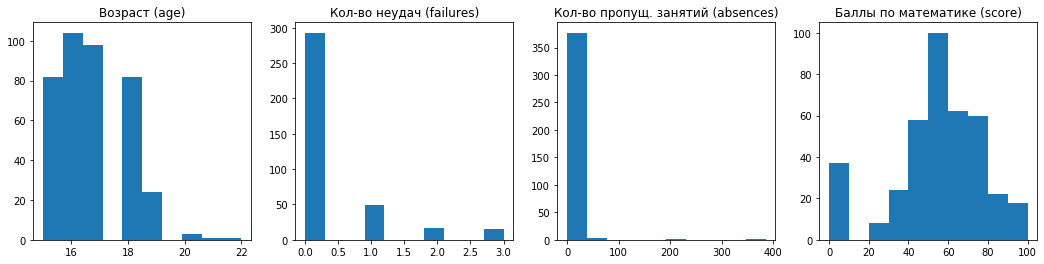

In [660]:
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

axes[0].hist(stud_math['age'])
axes[0].set_title('Возраст (age)')

axes[1].hist(stud_math['failures'])
axes[1].set_title('Кол-во неудач (failures)')

axes[2].hist(stud_math['absences'])
axes[2].set_title('Кол-во пропущ. занятий (absences)')

axes[3].hist(stud_math['score'])
axes[3].set_title('Баллы по математике (score)')

In [661]:
review_info_col('age')
review_info_col('failures')

Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 8


,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


столбец 'age' числовой и без пропусков. Видно, что большинство учеников имеют возраст от 15 до 19 лет (включительно)

не смотря на то, что в столбце 'failures' есть значения выбросов нет. Видно, что большинство учеников не совершают внеучебных неудач (в дальнейшем пустые значения будут рассмотрены отдельно)

In [662]:
# выбросов нет, так как количетсво учебных дней в году ~174 дня информация об общем кол-ве занятий отсутствует
# при количестве занятий в один день 5 шт. 174*5 = 870, хотя прогуливать так не ок
review_info_col('absences')
review_info_col('score')

Значений, встретившихся в столбце более 10 раз: 8
Уникальных значений: 36


,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Значений, встретившихся в столбце более 10 раз: 12
Уникальных значений: 18


,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   389 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


# 3. Оценка количества уникальных значений для номинативных переменных

In [663]:
for letter in stud_math.select_dtypes(include=['category']):
    print(review_info_col(letter))

Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   school  395 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     395 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   address  378 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   famsize  368 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   pstatus  350 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 5


,medu
4,131
2,102
3,97
1,59
0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   medu    392 non-null    category
dtypes: category(1)
memory usage: 723.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6


,fedu
2,106
3,96
4,88
1,78
0,2
40,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   fedu    371 non-null    category
dtypes: category(1)
memory usage: 731.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,mjob
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   mjob    376 non-null    category
dtypes: category(1)
memory usage: 723.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,fjob
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   fjob    359 non-null    category
dtypes: category(1)
memory usage: 723.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   reason  378 non-null    category
dtypes: category(1)
memory usage: 715.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 3


,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   guardian  364 non-null    category
dtypes: category(1)
memory usage: 627.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 3
Уникальных значений: 4


,traveltime
1,242
2,96
3,22
4,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   traveltime  367 non-null    category
dtypes: category(1)
memory usage: 715.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 4


,studytime
2,194
1,103
3,64
4,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   studytime  388 non-null    category
dtypes: category(1)
memory usage: 715.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   schoolsup  386 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   famsup  356 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   paid    355 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   activities  381 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   nursery  379 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   higher  375 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   internet  361 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 2
Уникальных значений: 2


,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   romantic  364 non-null    category
dtypes: category(1)
memory usage: 619.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 4
Уникальных значений: 6


,famrel
4,182
5,99
3,62
2,17
1,7
-1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   famrel  368 non-null    category
dtypes: category(1)
memory usage: 731.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,freetime
3,153
4,112
2,63
5,38
1,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   freetime  384 non-null    category
dtypes: category(1)
memory usage: 723.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,goout
3,127
2,101
4,84
5,52
1,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   goout   387 non-null    category
dtypes: category(1)
memory usage: 723.0 bytes
None
Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 5


,health
5,138
3,89
4,63
1,47
2,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   health  380 non-null    category
dtypes: category(1)
memory usage: 723.0 bytes
None


In [664]:
# на основании представленных данных можно сделать вывод о том, что значения в столбцах 'fedu' и 'famrel' не допустимы

<Figure size 360x360 with 0 Axes>

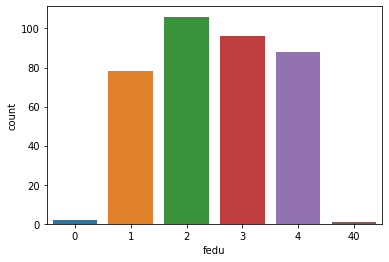

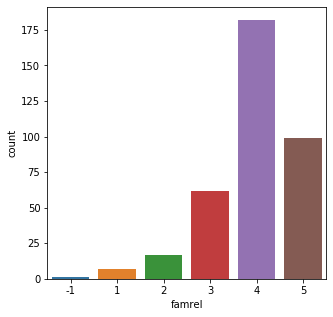

<Figure size 360x360 with 0 Axes>

In [665]:
sns.countplot(x='fedu', data=stud_math)
plt.figure(figsize=(5, 5))
sns.countplot(x='famrel', data=stud_math)
plt.figure(figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

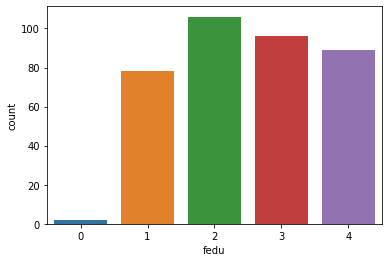

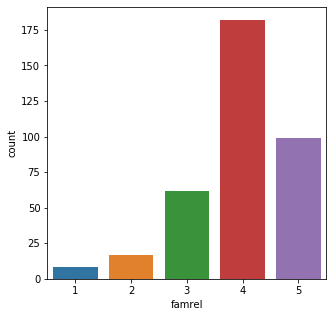

<Figure size 360x360 with 0 Axes>

In [678]:
# делаем замену недопустимых значений (выбросов). Проверяем
stud_math['fedu'] = np.where(stud_math['fedu'] == '40', '4', stud_math['fedu'])
stud_math['famrel'] = np.where(stud_math['famrel'] == '-1', '1', stud_math['famrel'])
stud_math['fedu'] = stud_math['fedu'].astype('category')
stud_math['famrel'] = stud_math['famrel'].astype('category')

sns.countplot(x='fedu', data=stud_math)
plt.figure(figsize=(5, 5))
sns.countplot(x='famrel', data=stud_math)
plt.figure(figsize=(5, 5))

# 5. Корреляционный анализ количественных переменных

Выясним, какие столбцы коррелируют с баллы по госэкзамену по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для количественных столбцов.

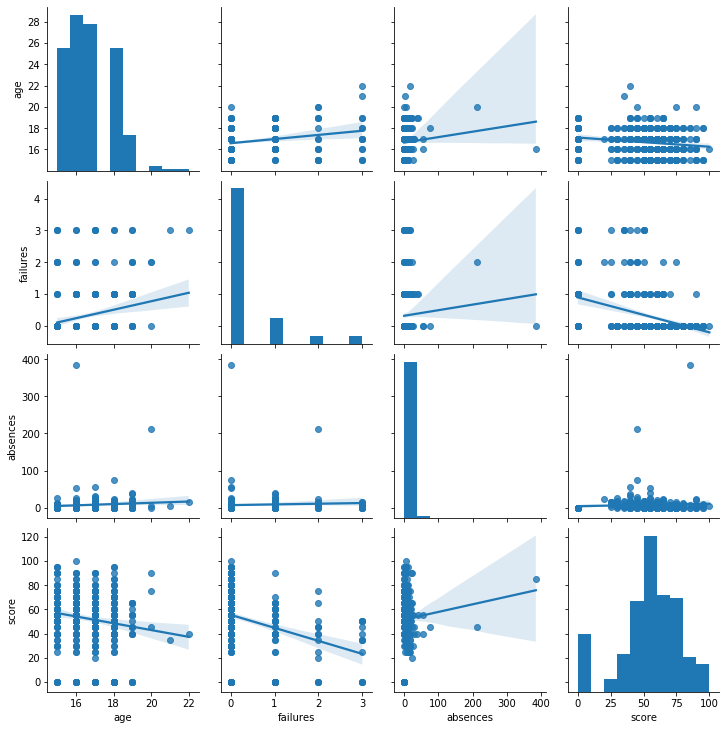

In [679]:
sns.pairplot(stud_math[['age', 'failures', 'absences', 'score']], kind = 'reg')

In [680]:
# используем матрицу корреляций
stud_math[['age', 'failures', 'absences', 'score']].corr()

,age,failures,absences,score
age,1.000000,0.228047,0.093592,-0.155726
failures,0.228047,1.000000,0.057391,-0.344338
absences,0.093592,0.057391,1.000000,0.065283
score,-0.155726,-0.344338,0.065283,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

In [681]:
# посмотрим что будет, если убрать возрастных учеников
stud_math1 = stud_math[['age', 'failures', 'absences', 'score']]
stud_math1 = stud_math1.query('age < 20')

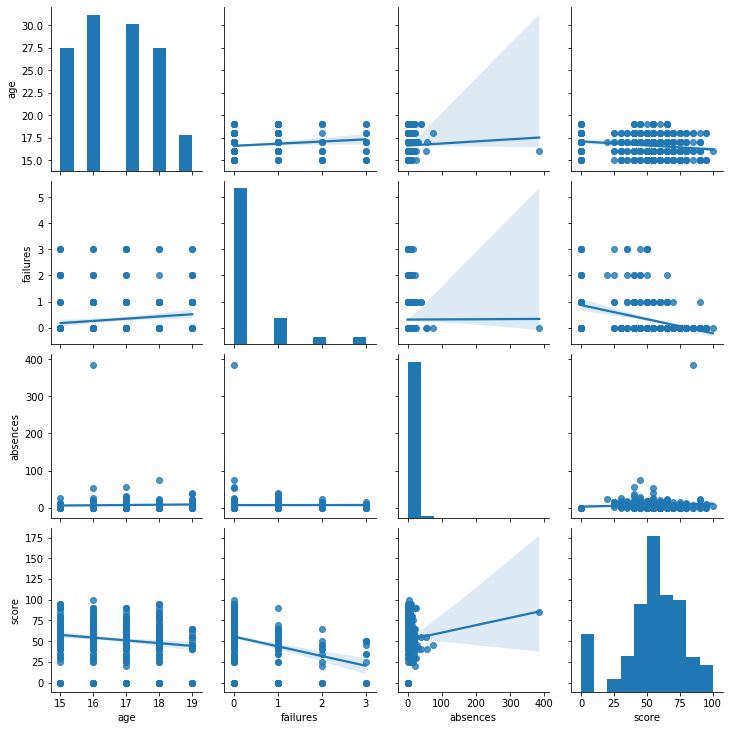

In [682]:
sns.pairplot(stud_math1[['age', 'failures', 'absences', 'score']], kind = 'reg')

In [683]:
# построим матрицу корреляций
stud_math1[['age', 'failures', 'absences', 'score']].corr()

,age,failures,absences,score
age,1.000000,0.142952,0.040936,-0.171707
failures,0.142952,1.000000,0.002061,-0.355198
absences,0.040936,0.002061,1.000000,0.083520
score,-0.171707,-0.355198,0.083520,1.000000


# 7. Анализ номинативных переменных

In [684]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 3))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

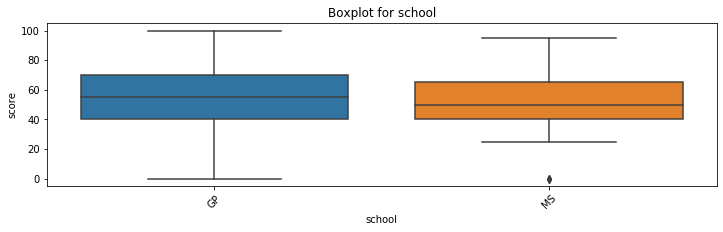

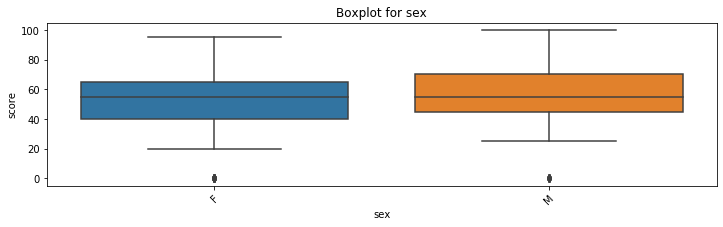

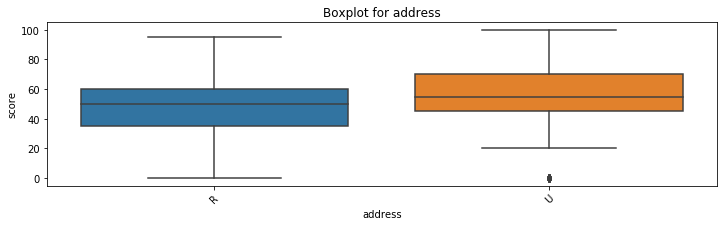

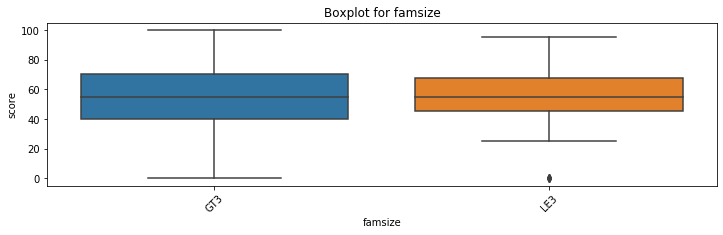

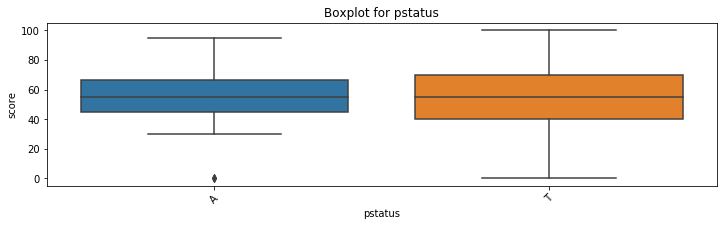

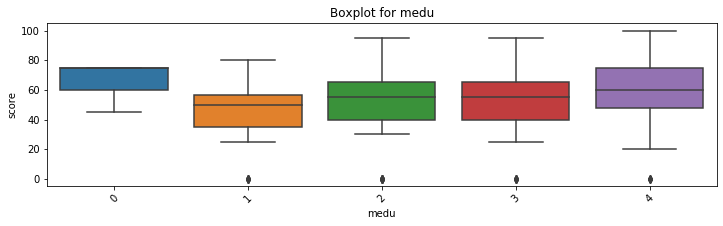

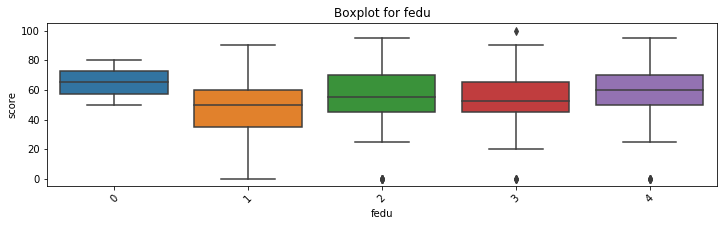

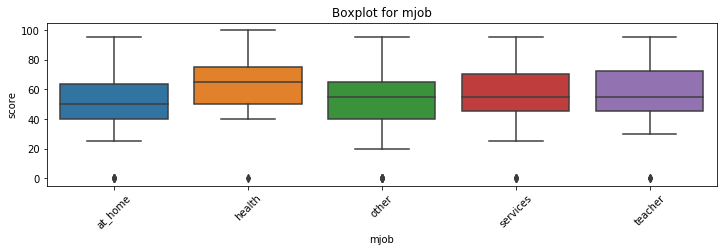

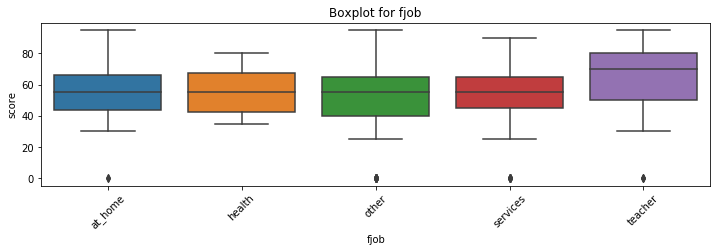

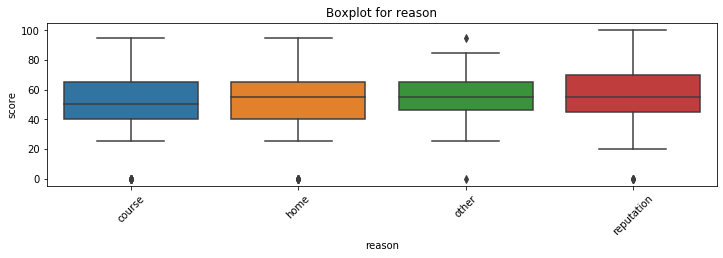

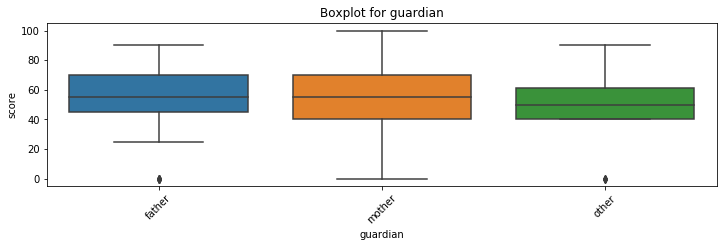

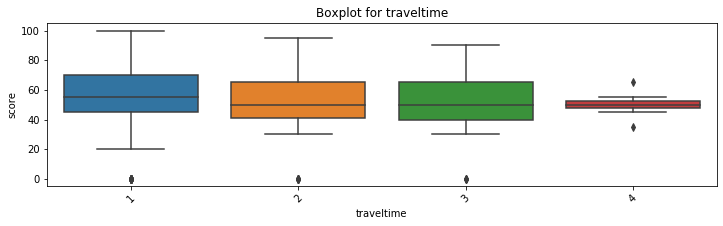

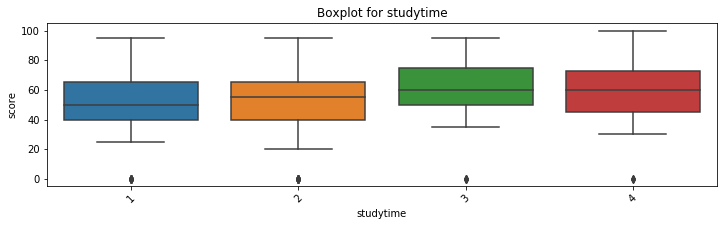

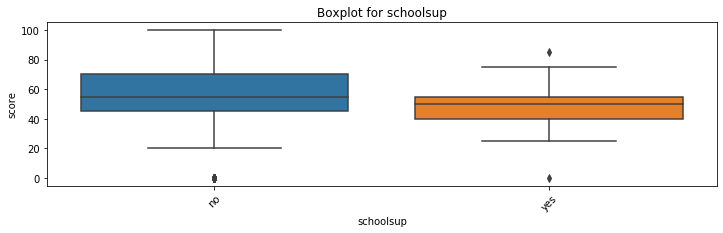

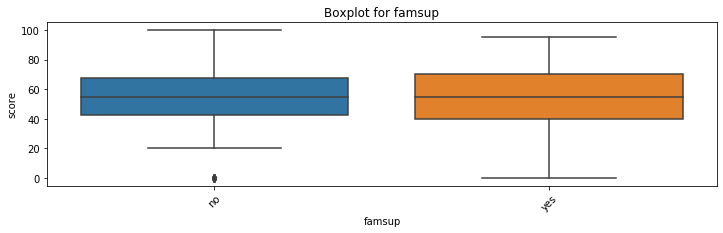

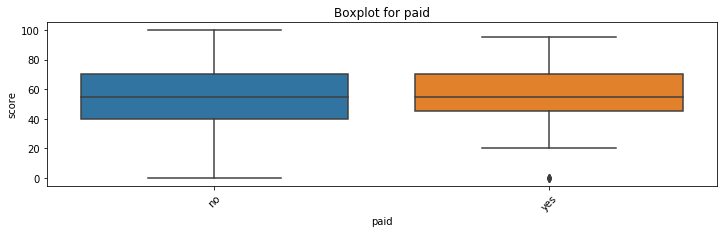

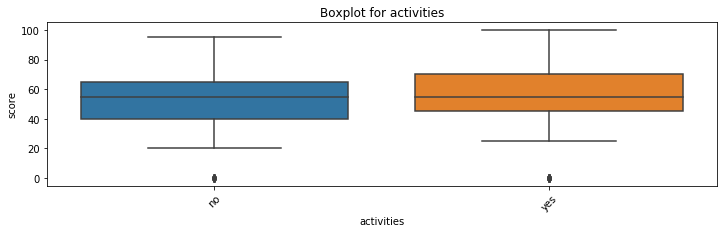

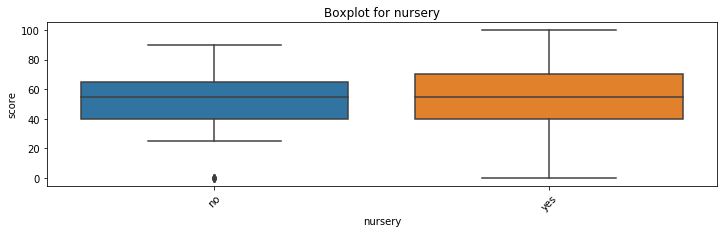

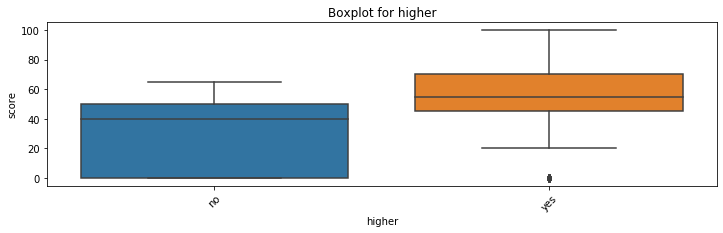

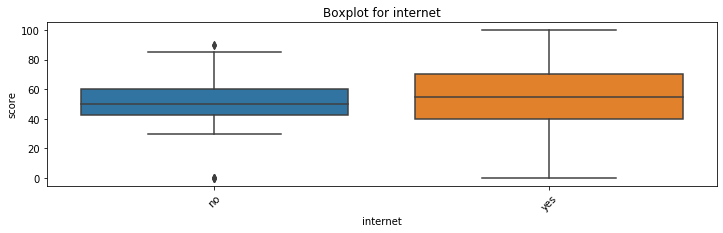

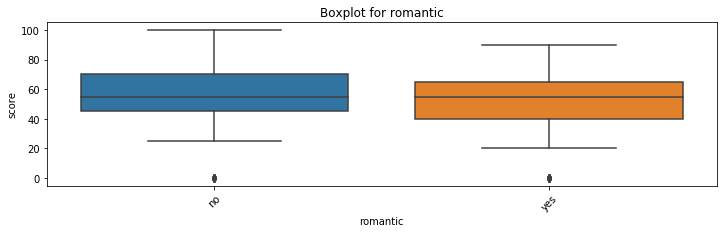

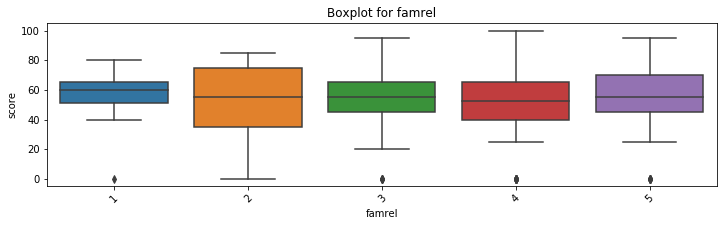

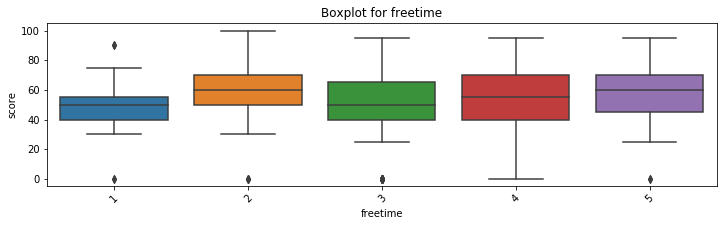

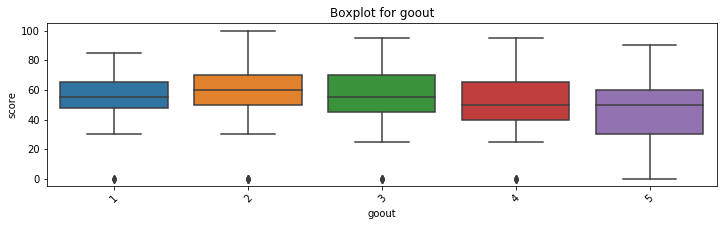

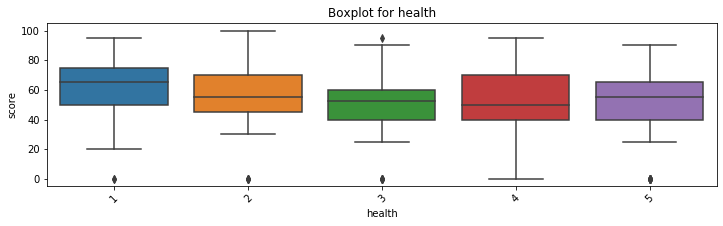

In [685]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health']:
    get_boxplot(col)

на первый взгляд можно предположить, что на оценку влияет место жительства, полноценная семья, образование родителей, желание получить высшее образование, наличие интернета, отсутствие романтических отношений
Не влияет: причина выбора школы/ семейная образовательная поддержка/ дополнительные платные занятия по математике

так как графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок учеников по различным параметрам неразличимы:

In [686]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [687]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'schoolsup', 
            'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
            'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки mjob


D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in greater

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning:

invalid value encountered in less

D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning:

invalid value encountered in less_equal

